<a href="https://colab.research.google.com/github/vu21csen0300061/EXPLORING_ML/blob/main/handwritten_image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

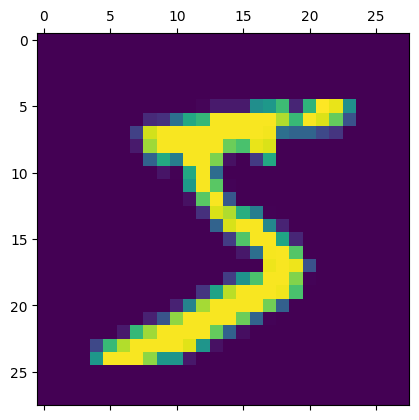

In [ ]:
plt.matshow(X_train[0])

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train=X_train/255
X_test=X_test/255
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [ ]:
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4706 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9252


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2676 - accuracy: 0.9252


[0.2675587832927704, 0.9251999855041504]

In [ ]:
y_predict=model.predict(X_test_flattened)
y_predict[0]

313/313 [==============================] - 1s 2ms/step


array([3.25018913e-02, 3.35197853e-07, 6.31504059e-02, 9.49658036e-01,
       2.27239425e-03, 1.29470959e-01, 1.53402766e-06, 9.99714017e-01,
       1.08542755e-01, 6.42130792e-01], dtype=float32)

In [ ]:
np.argmax(y_predict[0])

7

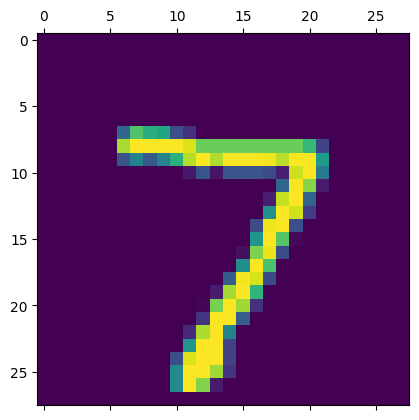

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    2,    0,    5,    2,    3,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   6,    9,  927,   16,    9,    5,   11,   10,   37,    2],
       [   4,    0,   19,  910,    2,   35,    1,   12,   21,    6],
       [   1,    1,    5,    1,  930,    0,    9,    4,   10,   21],
       [   9,    2,    5,   20,   10,  798,   10,    3,   30,    5],
       [  13,    3,    9,    1,    7,   22,  898,    2,    3,    0],
       [   1,    5,   24,    6,    9,    0,    0,  949,    5,   29],
       [   8,    7,    7,   19,    9,   31,    8,   11,  870,    4],
       [  10,    7,    2,   11,   38,    8,    0,   28,    9,  896]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'true')

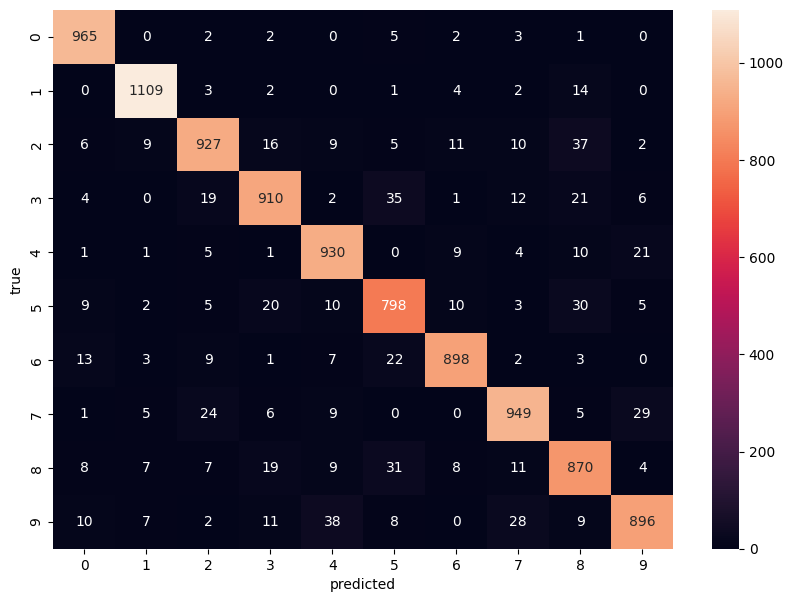

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('true')

In [ ]:
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2770 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1279 - accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0895 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0689 - accuracy: 0.9784
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0525 - accuracy: 0.9835


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0884 - accuracy: 0.9740


[0.08843659609556198, 0.9739999771118164]